<a href="https://colab.research.google.com/github/RodolfoPerna/portfolio/blob/master/Lego_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SETUP**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving sets.csv to sets.csv
Saving themes.csv to themes.csv


In [64]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")

Setup Complete


# **READ DATA**

In [0]:
# Read data
url = 'https://raw.githubusercontent.com/RodolfoPerna/portfolio/master/sets.csv'
sets = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/RodolfoPerna/portfolio/master/themes.csv'
themes = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/RodolfoPerna/portfolio/master/inventories.csv'
inventories = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/RodolfoPerna/portfolio/master/inventory_sets.csv'
inventory_sets = pd.read_csv(url)

# **DATA CLEANING AND RELANTIONSHIPS**

![alt text](https://raw.githubusercontent.com/RodolfoPerna/portfolio/master/downloads_schema.png)

In [6]:
inventory_sets.describe(include = 'all')

,inventory_id,set_num,quantity
count,2846.000000,2846,2846.000000
unique,NaN,2306,NaN
top,NaN,7241-1,NaN
freq,NaN,12,NaN
mean,8017.497892,NaN,1.375966
std,4798.898759,NaN,4.563002
min,35.000000,NaN,1.000000
25%,3691.750000,NaN,1.000000
50%,7902.000000,NaN,1.000000
75%,11476.000000,NaN,1.000000


In [19]:
inventories.loc[inventories.set_num == '10024-1' ]

,id,version,set_num
5480,7884,1,10024-1


In [18]:
sets.loc[sets.name == 'Red Baron']

,set_num,name,year,theme_id,num_parts
52,10024-1,Red Baron,2002,276,669


In [22]:
inventory_sets.loc[(inventory_sets.set_num == '10024-1')] 

,inventory_id,set_num,quantity
2535,14812,10024-1,1
2724,16127,10024-1,1


In [0]:
themes = themes.rename(columns={'id': 'theme_id'})
sets = sets.merge(themes, on='theme_id')

In [0]:
sets.rename(columns={"name_x":'set_name', 'num_parts':'pieces', 'name_y':'theme'}, inplace=True)

In [26]:
# simply drop whole column "parent_id"
sets.drop('parent_id', axis=1, inplace=False)

,set_num,set_name,year,theme_id,pieces,theme
0,00-1,Weetabix Castle,1970,414,471,Castle
1,0011-2,Town Mini-Figures,1978,84,12,Supplemental
2,2181-1,Infomaniac,1997,84,4,Supplemental
3,300-1,T-Junction Road Plates,1978,84,2,Supplemental
4,301-1,Curved Road Plates,1978,84,2,Supplemental
...,...,...,...,...,...,...
11668,K6762-1,Western Kit,2002,475,3,Western
11669,K7623-1,Indiana Jones Classic Adventures Collection,2008,264,4,Indiana Jones
11670,llca27-1,Legoland Pirate with Parrot (Legoland California),2006,430,70,Pirates
11671,LLCA29-1,Pirate Treasure Chest Bank (LLCA Ambassador Pa...,2006,430,215,Pirates


In [27]:
# replace "?" to NaN
sets.replace("?", np.nan, inplace = True)
missing_data = sets.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

set_num
False    11673
Name: set_num, dtype: int64

set_name
False    11673
Name: set_name, dtype: int64

year
False    11673
Name: year, dtype: int64

theme_id
False    11673
Name: theme_id, dtype: int64

pieces
False    11673
Name: pieces, dtype: int64

theme
False    11673
Name: theme, dtype: int64

parent_id
False    8046
True     3627
Name: parent_id, dtype: int64



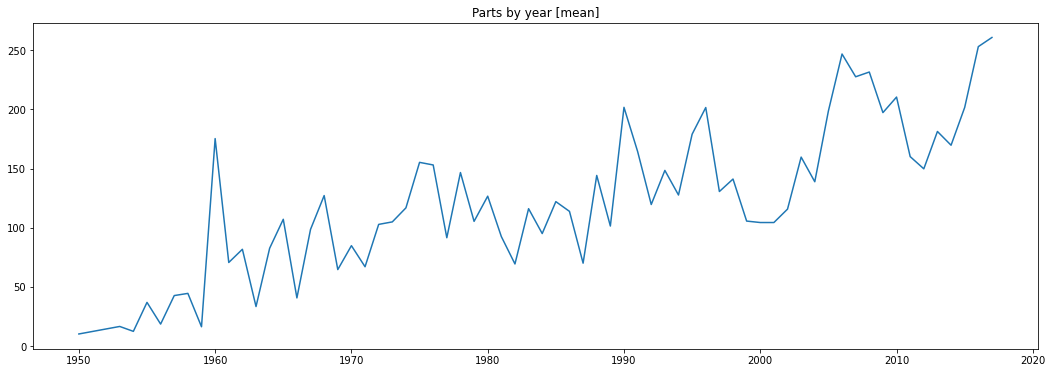

In [28]:
parts_by_year = sets[['year','pieces']].groupby('year').mean()
plt.figure(figsize=(18,6)) #define the figure size
plt.title("Parts by year [mean]") #plot title
sns.lineplot(data=parts_by_year['pieces']) #create line plot

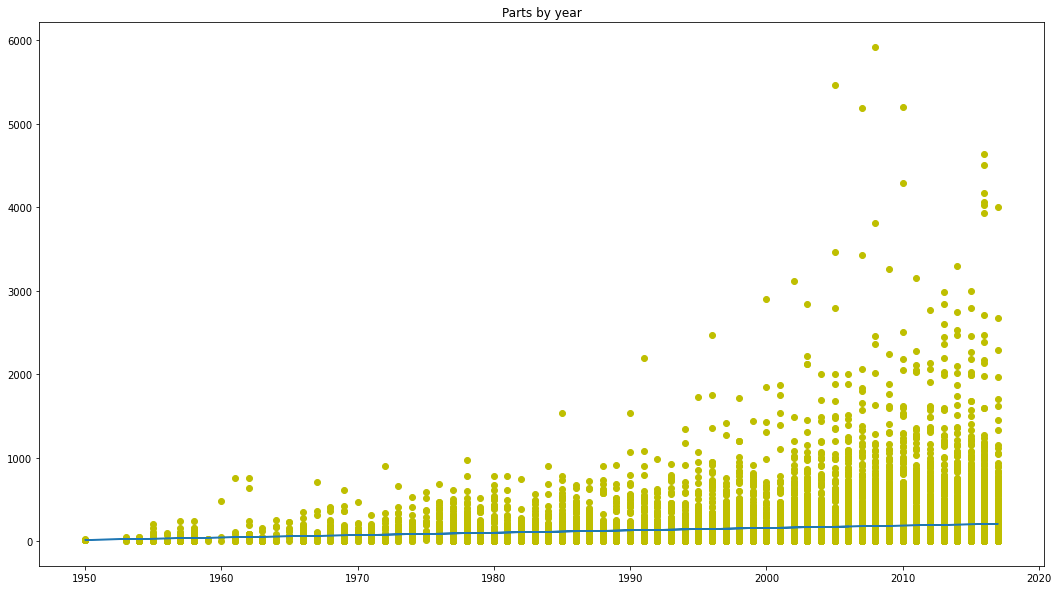

In [29]:
x = sets.year
y = sets.pieces
m, b = np. polyfit(x, y, 1)
plt.figure(figsize=(18,10))
plt.title("Parts by year")
plt.plot(x, y, 'yo') # create scatter plot.
plt.plot(x, m*x + b) # add line of best fit.

In [30]:
sets[['theme','pieces']].groupby('theme', as_index = True).mean().sort_values(by = 'pieces', ascending = False).head(15)

,pieces
theme,
Modular Buildings,2350.583333
Mosaic,1843.250000
Sculptures,1716.695652
Ultimate Collector Series,1680.333333
FIRST LEGO League,1387.000000
Order of the Phoenix,904.000000
The Two Towers,869.200000
Williams F1,787.500000
Lamborghini,770.000000


In [0]:
#modular_buildings = sets.loc[sets.name_y == 'Modular Buildings']
#modular_buildings.sort_values(by = 'year', ascending = False)

modular_buildings = sets.loc[sets.theme == 'Modular Buildings'].sort_values(by = 'year', ascending = False).head(10)

Text(0, 0.5, 'pieces')

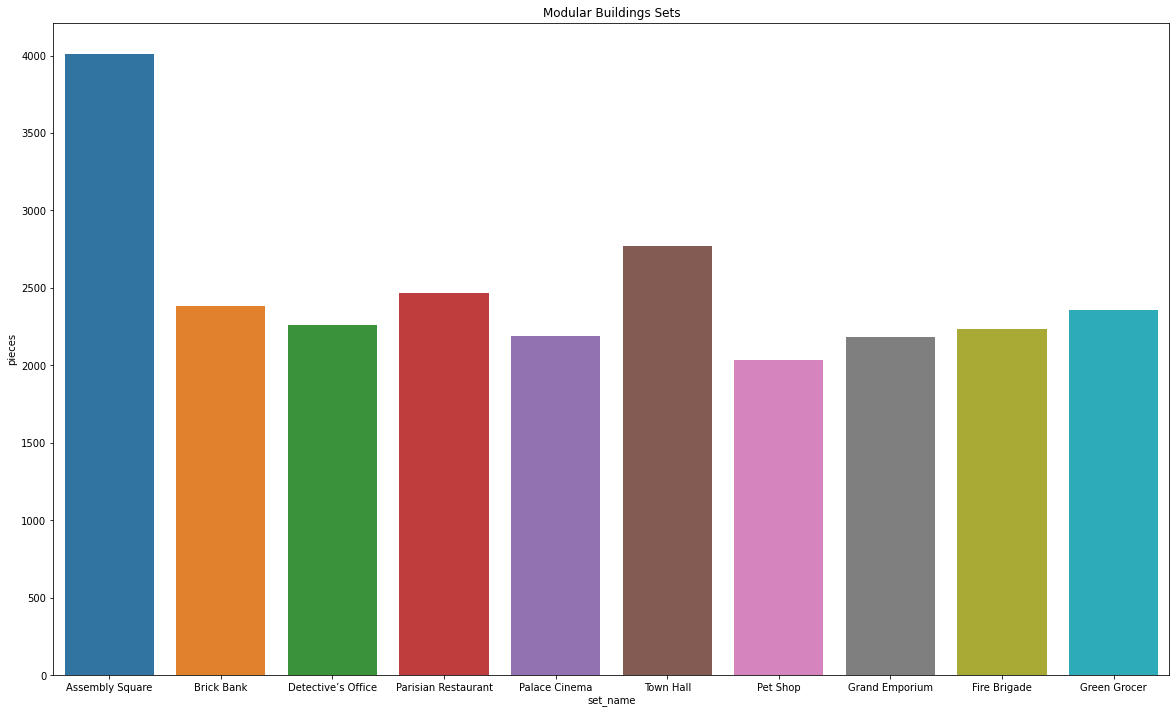

In [36]:
plt.figure(figsize=(20,12))
plt.title("Modular Buildings Sets")
sns.barplot(x=modular_buildings['set_name'], y=modular_buildings['pieces'])
plt.ylabel("pieces")

In [0]:
mosaic_buildings = sets.loc[sets.theme == 'Mosaic'].sort_values(by = 'year', ascending = False).head(10)

Text(0, 0.5, 'pieces')

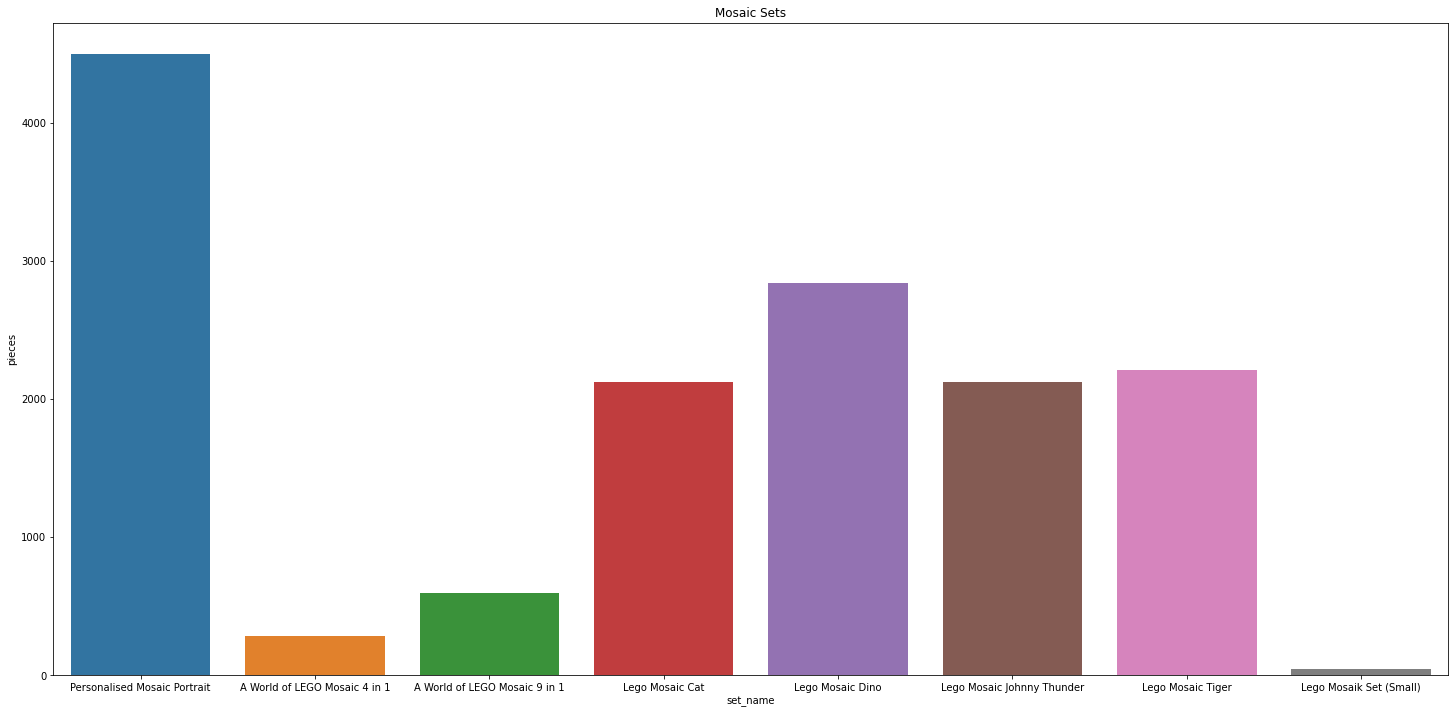

In [39]:
plt.figure(figsize=(25,12))
plt.title("Mosaic Sets")
sns.barplot(x=mosaic_buildings['set_name'], y=mosaic_buildings['pieces'])
plt.ylabel("pieces")

In [0]:
sculpture_buildings = sets.loc[sets.theme == 'Sculptures'].sort_values(by = 'pieces', ascending = False).head(10)

Text(0, 0.5, 'pieces')

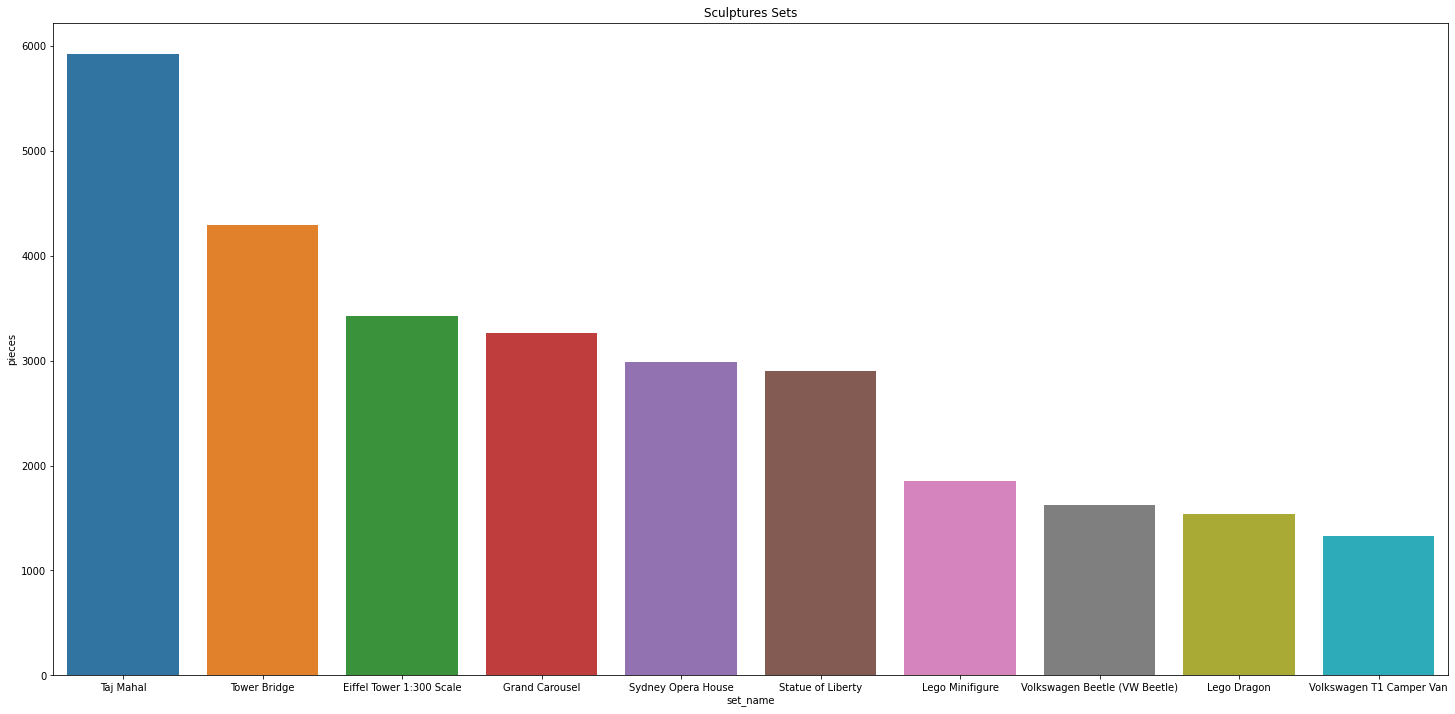

In [42]:
plt.figure(figsize=(25,12))
plt.title("Sculptures Sets")
sns.barplot(x=sculpture_buildings['set_name'], y=sculpture_buildings['pieces'])
plt.ylabel("pieces")

In [0]:
sets.loc[sets['num_parts'] == sets.groupby('name_y')['num_parts'].transform('max')].sort_values(by = 'num_parts', ascending = False).head(15)

,set_num,name_x,year,theme_id,num_parts,name_y,parent_id_x,name,parent_id_y
730,10189-1,Taj Mahal,2008,276,5922,Sculptures,NaN,Sculptures,NaN
1225,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,169,5461,Star Wars Episode 4/5/6,158.0,Star Wars Episode 4/5/6,158.0
3100,2000409-1,Window Exploration Bag,2010,507,5200,Educational and Dacta,NaN,Educational and Dacta,NaN
1393,75827-1,Firehouse Headquarters,2016,301,4640,Other,NaN,Other,NaN
9026,40179-1,Personalised Mosaic Portrait,2016,277,4501,Mosaic,276.0,Mosaic,276.0
2093,10253-1,Big Ben,2016,43,4166,Building,38.0,Building,38.0
10749,71040-1,The Disney Castle,2016,608,4060,Disney,NaN,Disney,NaN
545,75159-1,Death Star,2016,158,4023,Star Wars,NaN,Star Wars,NaN
1479,10255-1,Assembly Square,2017,155,4009,Modular Buildings,NaN,Modular Buildings,NaN
9249,42055-1,Bucket Wheel Excavator,2016,7,3928,Construction,5.0,Construction,5.0


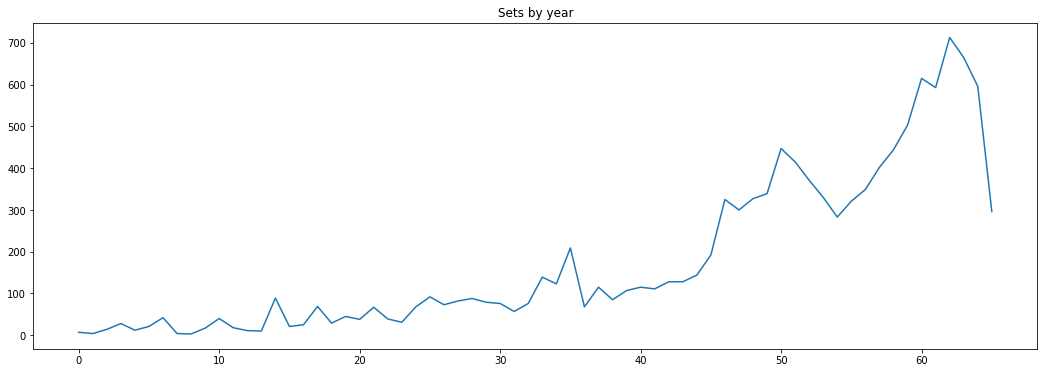

In [65]:
grouped = sets.groupby('year')
aggregate = list((k, v["theme_id"].count()) for k, v in grouped)
sets_by_year = pd.DataFrame(aggregate, columns=['year', 'num_sets'])#.set_index('year')
plt.figure(figsize=(18,6)) #define the figure size
plt.title("Sets by year") #plot title
sns.lineplot(data=sets_by_year['num_sets']) #create line plot

In [0]:
sets_by_year.merge(parts_by_year, on='year').sort_values(by = 'num_sets', ascending = False).head(5)

,year,num_sets,num_parts
62,2014,713,169.715288
63,2015,665,201.669173
60,2012,615,149.765854
64,2016,596,253.077181
61,2013,593,181.344013


In [58]:
bins = np.linspace(min(sets["pieces"]), max(sets["pieces"]), 13)
group_names = ['Individual','Tiny','Micro','Mini','Small', 'Regular','Medium','Large','X-Large', 'Super', 'Awasome', 'OMG']
sets['pieces-binned'] = pd.cut(sets['pieces'], bins, labels=group_names, include_lowest=True )
sets[['pieces','pieces-binned','year']].head(20)

,pieces,pieces-binned,year
0,471,Individual,1970
1,12,Individual,1978
2,4,Individual,1997
3,2,Individual,1978
4,2,Individual,1978
5,2,Individual,1983
6,2,Individual,1978
7,2,Individual,1979
8,2,Individual,1979
9,2,Individual,1979


In [59]:
sets["pieces-binned"].value_counts()

Individual    10645
Tiny            734
Micro           166
Mini             53
Small            39
Regular          15
Medium            7
X-Large           5
Large             3
OMG               2
Awasome           2
Super             2
Name: pieces-binned, dtype: int64

Text(0.5, 1.0, 'pieces bins')

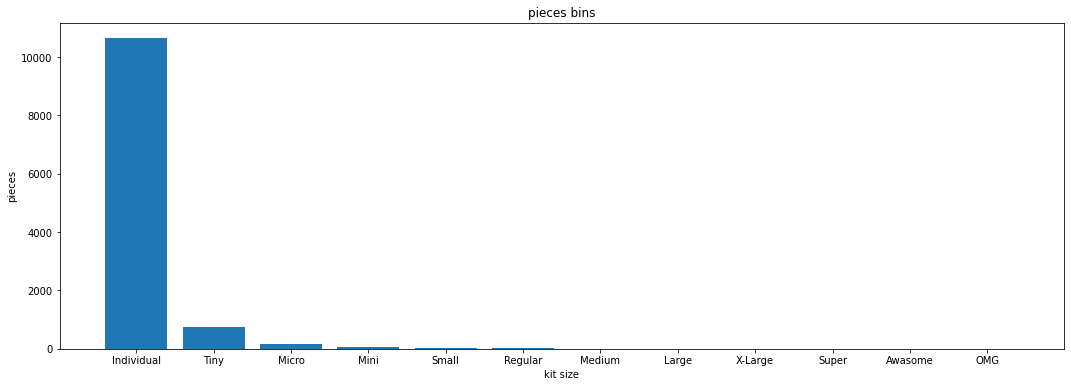

In [67]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.figure(figsize=(18,6)) #define the figure size
pyplot.bar(group_names, sets["pieces-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("kit size")
plt.pyplot.ylabel("pieces")
plt.pyplot.title("pieces bins")

![alt text](https://cdn.awsli.com.br/600x1000/91/91201/produto/23788982/5f3ce28e94.jpg)

![alt text](https://cdn.awsli.com.br/600x1000/91/91201/produto/13744563/be979e1272.jpg)

![alt text](https://cdn.awsli.com.br/800x800/91/91201/produto/15384314/864ff9a8c1.jpg)

![alt text](https://cdn.awsli.com.br/800x800/91/91201/produto/6174003/03be7d5f74.jpg)

> Lego Technic 42043

